In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('C:\\Users\\sahithi\\Desktop\\r\\study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [113]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [115]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [117]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [119]:
from sklearn.preprocessing import LabelEncoder

In [121]:
encoder = LabelEncoder()
categorical_cols = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
print(df.head())

   gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


### Adding new feature total score and percentage

In [124]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["percentage"]=df["total_score"]/3

In [126]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,percentage
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282,94.000000
996,1,2,2,0,1,62,55,55,172,57.333333
997,0,2,2,0,0,59,71,65,195,65.000000
998,0,3,4,1,0,68,78,77,223,74.333333


## removing outliers

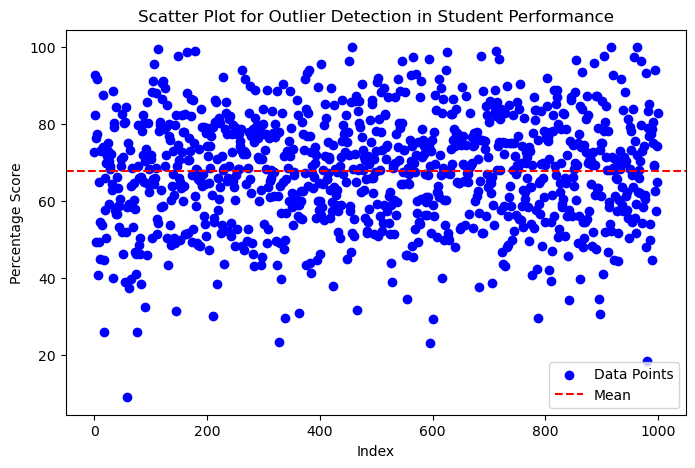

In [129]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)), df['percentage'], color='blue', label='Data Points')
plt.axhline(y=df['percentage'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Index")
plt.ylabel("Percentage Score")
plt.title("Scatter Plot for Outlier Detection in Student Performance")
plt.legend()
plt.show()

In [131]:
from scipy.stats import zscore

z_score=np.abs(zscore(df.select_dtypes(include=["number"])))
cleaned=df[(z_score<3).all(axis=1)]
print("Dataset Shape after removing outliers:",cleaned.shape)

Dataset Shape after removing outliers: (993, 10)


### box plot

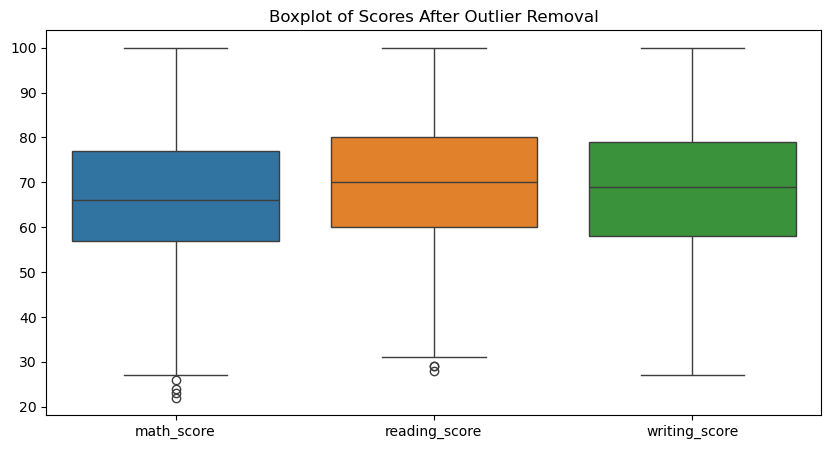

In [134]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned[["math_score","reading_score","writing_score"]])
plt.title("Boxplot of Scores After Outlier Removal")
plt.show()

## Feature selection

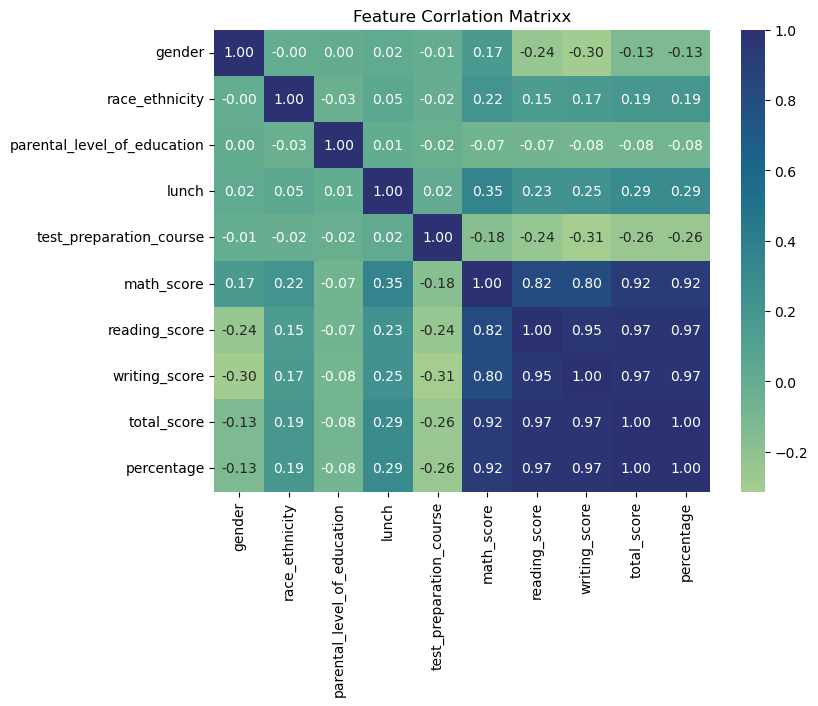

In [137]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='crest',fmt='.2f')
plt.title('Feature Corrlation Matrixx')
plt.show()

In [139]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X=df.drop(columns=['total_score', 'percentage'])
y=df['percentage']
model=RandomForestRegressor()
rfe=RFE(model, n_features_to_select=3)
X_selected=rfe.fit_transform(X,y)
selected_features=X.columns[rfe.support_]
print("Selected Features using RFE: ",selected_features)

Selected Features using RFE:  Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


In [141]:
import numpy as np
from sklearn.linear_model import Lasso

X=df.drop(columns=['total_score','percentage']) 
y=df['percentage']
lasso=Lasso(alpha=0.1)
lasso.fit(X, y)
importance=np.abs(lasso.coef_)
selected_features = X.columns[importance > 0]
print("Selected Features using Lasso: ", selected_features)

Selected Features using Lasso:  Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


## Handling Imbalanced Data(SMOTE)

In [144]:
from imblearn.over_sampling import SMOTE

def categorize_performance(score):
    if score < 50:
        return "Low"
    elif 50 <= score < 75:
        return "Medium"
    else:
        return "High"

df['Performance'] = df['percentage'].apply(categorize_performance)
encoder = LabelEncoder()
df['Performance'] = encoder.fit_transform(df['Performance'])

X = df[['math_score', 'reading_score', 'writing_score']]
y = df['Performance']
print("\nBefore SMOTE:\n", df['Performance'].value_counts())

smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled = pd.Series(encoder.inverse_transform(y_resampled))
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=['math_score', 'reading_score', 'writing_score']),
                         pd.DataFrame(y_resampled, columns=['Performance'])], axis=1)

print("\nAfter SMOTE:\n", df_balanced['Performance'].value_counts())


Before SMOTE:
 Performance
2    573
0    324
1    103
Name: count, dtype: int64

After SMOTE:
 Performance
Medium    573
High      573
Low       573
Name: count, dtype: int64


## visualizing distributions

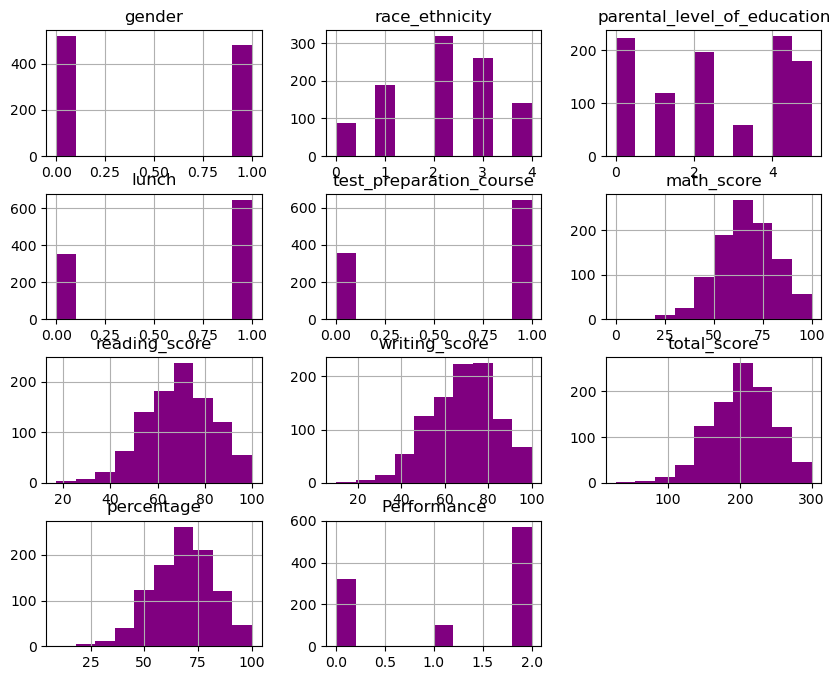

In [147]:
df.hist(bins=10, figsize=(10, 8),color='purple')
plt.show()

### bar plot

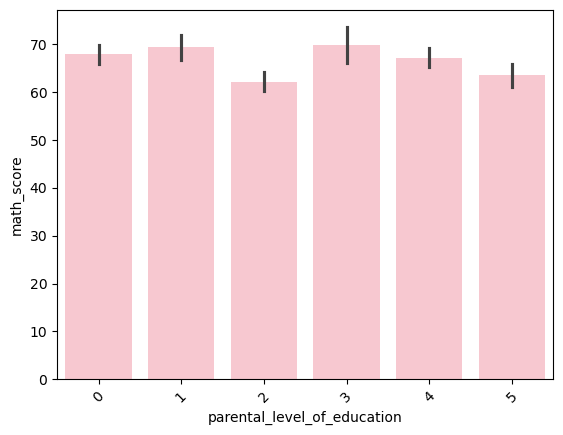

In [150]:
sns.barplot(x='parental_level_of_education', y='math_score',color='pink',data=df)
plt.xticks(rotation=45)
plt.show()

### correlation matrix

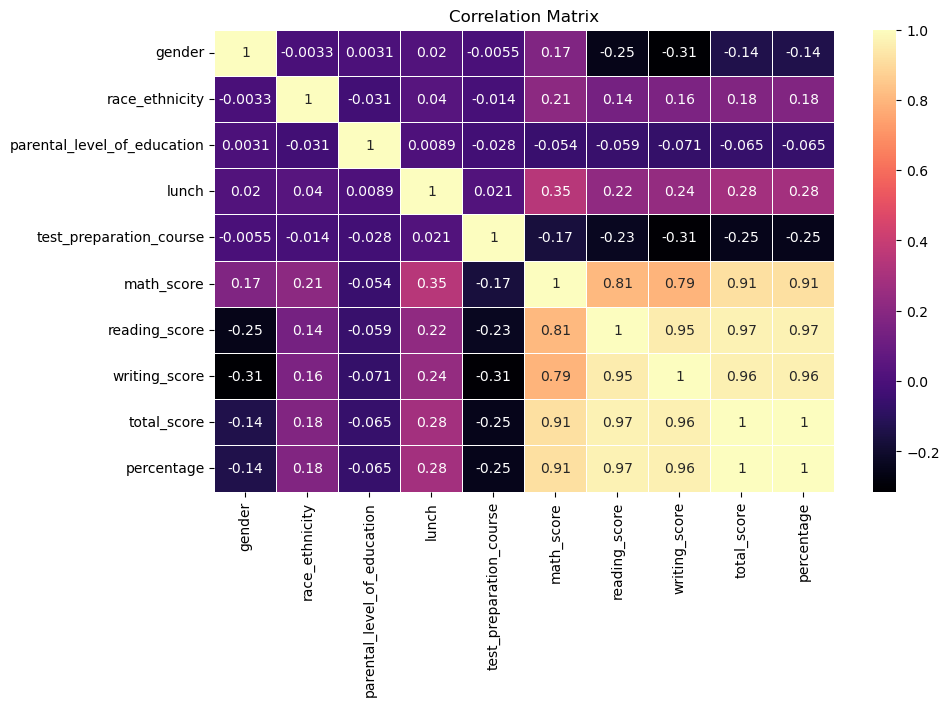

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned.corr(), annot=True,cmap="magma",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()